## Lab 6 Report


Paul Chung

In [1]:
%matplotlib notebook
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import csv
import pandas as pd 
from scipy.io import wavfile as wav
import simpleaudio as sa
from scipy.io import wavfile as wav
from scipy import signal as sig
import math

<IPython.core.display.Javascript object>


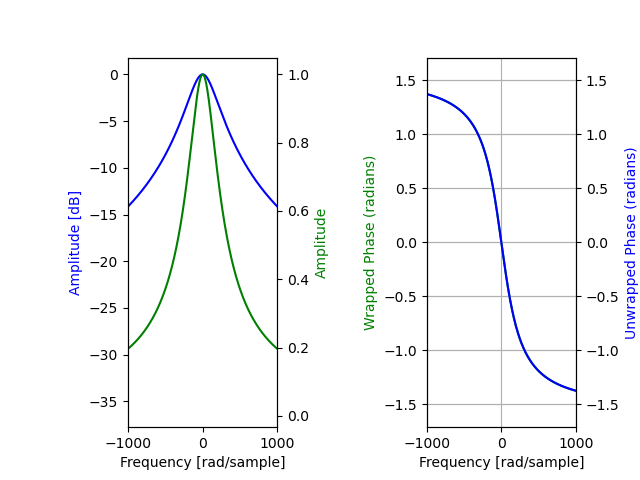

<ipython-input-2-3ea725c701f9>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig1.add_subplot(121)
<ipython-input-2-3ea725c701f9>:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3=fig1.add_subplot(1,2,2)


<IPython.core.display.Javascript object>


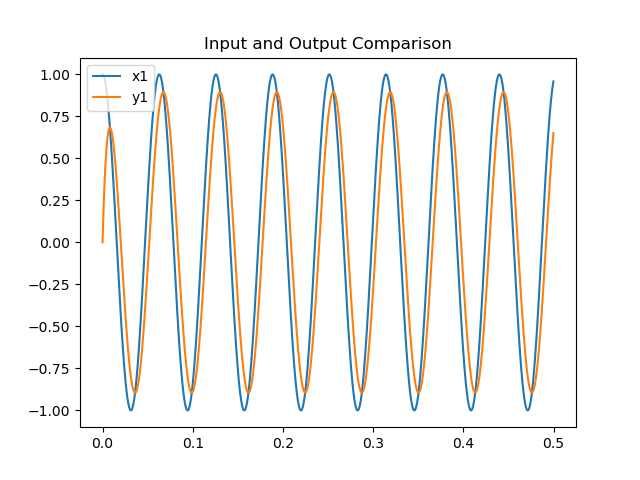

Text(0.5, 1.0, 'Input and Output Comparison')

In [2]:
# Assignment 1 

# Part A.

# initial declarations
pi=np.pi
fs=4000
t=np.arange(0,0.5,1/fs)
x1=np.cos(100*t)

Nfft=8192

spacing=fs/Nfft
w_s=np.arange(-fs/2,fs/2,spacing)*2*pi # frequency samples

# Part B.

alpha=200

# create the filter
num=[alpha]
den=[1,alpha]
filt=sig.lti(num,den) 

# check and plot the frequency response of the filter

w, h = sig.freqresp(filt,w_s)

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace=1,wspace=1,left=0.2)
plt.title('Digital filter frequency response')

plt.subplot(1,2,1)
ax1 = fig1.add_subplot(121)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-1000,1000)

ax2 = ax1.twinx()
plt.plot(w,abs(h), color='g')
plt.ylabel('Amplitude', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.xlabel('Frequency [rad/sample]')
plt.xlim(-1000,1000)

plt.subplot(1,2,2)

ax3=fig1.add_subplot(1,2,2)
angles = np.angle(h)
plt.plot(w, angles, 'g')
plt.ylabel('Wrapped Phase (radians)', color='g')
plt.xlabel('Frequency [rad/sample]')
plt.grid()
plt.axis('tight')
plt.xlim(-1000,1000)

ax4 = ax3.twinx()
#angles = np.unwrap(angles)
plt.plot(w, np.unwrap(angles), 'b')
plt.ylabel('Unwrapped Phase (radians)', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid()
plt.axis('tight')
plt.xlim(-1000,1000)

# Part C.

# apply the filter to the input and then obtain and plot the output
t_y,y1,y_evolve=sig.lsim(filt,x1,t)

fig2=plt.figure(2)

plt.plot(t,x1,label='x1')
plt.plot(t,y1,label='y1')
plt.legend()
plt.title('Input and Output Comparison')



## Discussion

#### If you put two identical ideal low-pass filters in series, then the overall response will be unchanged. Comment on what will happen if you put two identical versions of the above filter in series. Do you expect the amplitude of the response to x1 to be greater or smaller than for asingle filter? (Note that you can test this by letting the output y1 be an input to the same filter.)

If we put two identical versions of the above NON-IDEAL filter in series, the amplitude of the overall response will decrease. However, if we were to put two identical IDEAL low-pass filters in series, then the overall response will be unchanged. 

<IPython.core.display.Javascript object>


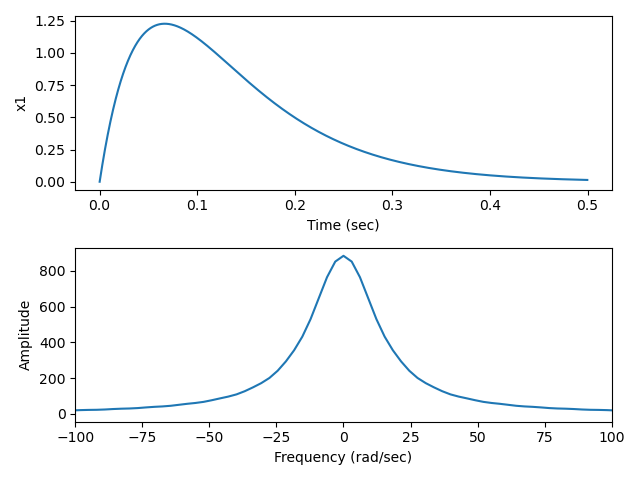

<IPython.core.display.Javascript object>


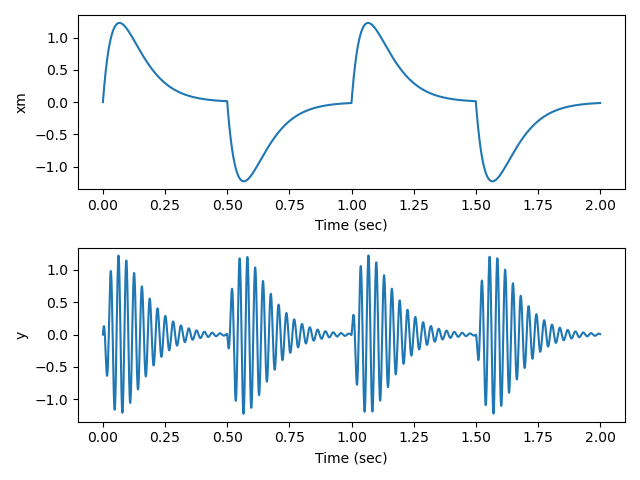

<IPython.core.display.Javascript object>


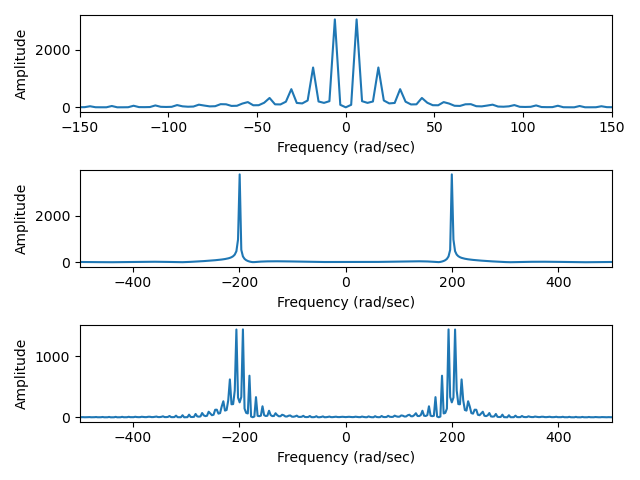

In [3]:
# Assignment 2
# Part A
def u(t):
    return 1.0 * (t>=0)

fs=4000
t=np.arange(0,0.5,1/fs)

x_1 = 50*t*np.exp(-15*t)*u(t)
x_0 = -1 * x_1

pi=np.pi
samples = 8192
delta_f = fs/samples
w_s = np.arange(-fs/2, fs/2, delta_f)*2*pi
ftx1 = np.fft.fft(x_1, samples)
ftx1_shift = np.fft.fftshift(np.abs(ftx1))

fig3 = plt.figure(3)
plt.subplot(2,1,1)
plt.plot(t, x_1)
plt.xlabel('Time (sec)')
plt.ylabel('x1')

plt.subplot(2,1,2)
plt.plot(w_s, ftx1_shift)
plt.xlabel('Frequency (rad/sec)')
plt.ylabel('Amplitude')
plt.xlim(-100,100)
plt.tight_layout()

# Part B
t1 = np.arange(0,2,1/fs)
xm = np.concatenate((x_1,x_0,x_1,x_0))
c = np.cos(200*t1)
y = xm*c

# Part C
fig4 = plt.figure(4)
plt.subplot(2,1,1)
plt.plot(t1,xm)
plt.xlabel('Time (sec)')
plt.ylabel('xm')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(t1,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.tight_layout()

# Part D
fig5 = plt.figure(5)
plt.subplot(3,1,1)
ftxm = np.fft.fft(xm, samples)
ftxm_shift = np.fft.fftshift(np.abs(ftxm))
plt.plot(w_s, ftxm_shift)
plt.xlabel('Frequency (rad/sec)')
plt.ylabel('Amplitude')
plt.xlim(-150,150)

plt.subplot(3,1,2)
ftc = np.fft.fft(c, samples)
ftc_shift = np.fft.fftshift(np.abs(ftc))
plt.plot(w_s, ftc_shift)
plt.xlabel('Frequency (rad/sec)')
plt.ylabel('Amplitude')
plt.xlim(-500,500)

plt.subplot(3,1,3)
fty = np.fft.fft(y, samples)
fty_shift = np.fft.fftshift(np.abs(fty))
plt.plot(w_s, fty_shift)
plt.xlabel('Frequency (rad/sec)')
plt.ylabel('Amplitude')
plt.xlim(-500,500)
plt.tight_layout()


## Discussion

#### In this assignment, we analyzed a system with input-output relationship y(t) = x(t) cos(200t). Is this system LTI? Justify your answer.



<IPython.core.display.Javascript object>


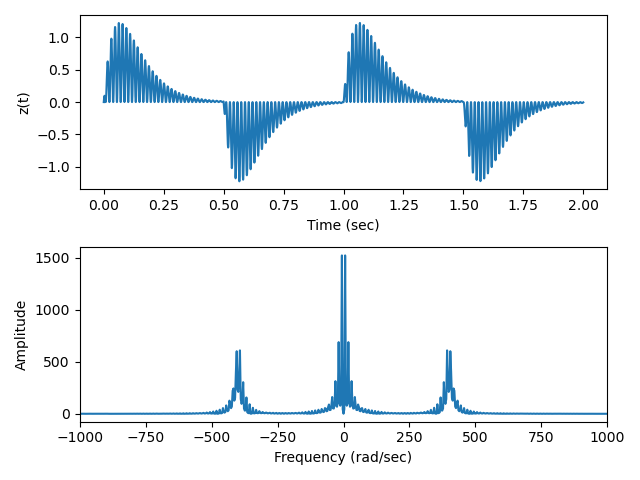

<IPython.core.display.Javascript object>


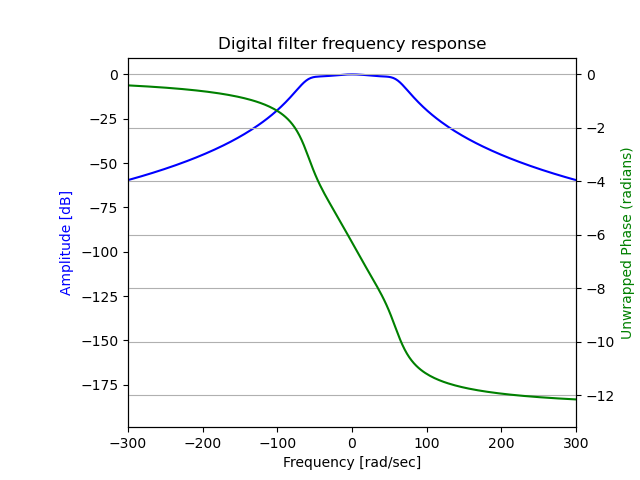

<ipython-input-4-2c1451d59ce3>:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig7.add_subplot(111)


<IPython.core.display.Javascript object>


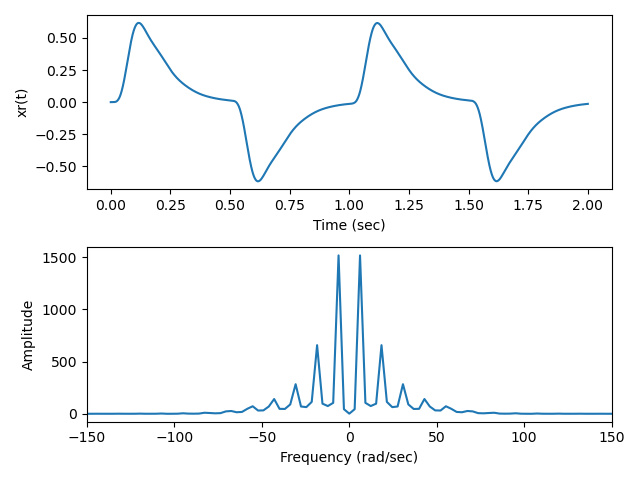

In [4]:
# Assignment 3

# Part A
t1 = np.arange(0,2,1/fs)
xm = np.concatenate((x_1,x_0,x_1,x_0))
c = np.cos(200*t1)
y = xm*c
z = y*c

pi=np.pi
samples = 8192
delta_f = fs/samples
w_s = np.arange(-fs/2, fs/2, delta_f)*2*pi
ftz = np.fft.fft(z, samples)
ftz_shift = np.fft.fftshift(np.abs(ftz))

fig6= plt.figure(6)
plt.subplot(2,1,1)
plt.plot(t1,z)
plt.xlabel('Time (sec)')
plt.ylabel('z(t)')

plt.subplot(2,1,2)
plt.plot(w_s, ftz_shift)
plt.xlabel('Frequency (rad/sec)')
plt.ylabel('Amplitude')
plt.xlim(-1000,1000)
plt.tight_layout()

# Part B

# create the filter
num=[2*(10**9)]
den=[240, 3*(10**4), 2.2*(10**6), 10**8, 2*(10**9)]
filt=sig.lti(num,den) 

# check and plot the frequency response of the filter
w, h = sig.freqresp(filt,w_s)

fig7 = plt.figure(7)
fig7.subplots_adjust(hspace=1,wspace=1,left=0.2)
plt.title('Digital filter frequency response')

# Magnitude plot

ax1 = fig7.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sec]')
plt.xlim(-300,300)

# Phase plot
ax2 = ax1.twinx()
angles = np.angle(h)
plt.plot(w, np.unwrap(angles), 'g')
plt.ylabel('Unwrapped Phase (radians)', color='g')
plt.xlabel('Frequency [rad/sec]')
plt.grid()
plt.axis('tight')
plt.xlim(-300,300)

# Part C

tx, xr, xs = sig.lsim(filt, z, t1)
fig8 = plt.figure(8)
plt.subplot(2,1,1)
plt.plot(tx, xr)
plt.xlabel('Time (sec)')
plt.ylabel('xr(t)')

ftxr = np.fft.fft(xr, samples)
ftxr_shift = np.fft.fftshift(np.abs(ftxr))
plt.subplot(2, 1, 2)
plt.plot(w_s, ftxr_shift)
plt.xlabel('Frequency (rad/sec)')
plt.ylabel('Amplitude')
plt.xlim(-150, 150)
plt.tight_layout()






## Discussion

#### A student decides to use a shorter signal of the form $x_1(t) = Ate^{−150t}u(t)$, thinking that the message can be communicated in a tenth of the time. They claim to see the exact same graph for xr(t) as they saw in their pre-lab. Explain why the student is incorrect, and why this solution will not work.

Since the exponent is increased from -15t to -150t, this causes the Fourier Transform of x_1(t) to have a larger bandwidth frequency such that it exceeds the carrier frequency which means there will be lost information of the original signal. 


In [7]:
# Assignment 4 



In [5]:
# function to check if the time slice in question is a space or not
def not_space(time_slice,fs):
    t=np.arange(0,0.5,1/fs)
    x_zero = 0 * t
    zero_error = np.sum(np.square(time_slice-x_zero))
     # most time slice error values are above 220 when compared to zero vector, some anomalies are well below it
    threshold = 220
    if(zero_error < threshold):
        return False
    else:
        return True


In [6]:
def decode(xr,fs):
    letter_code = []
    t=np.arange(0,0.5,1/fs)
    x_dash = 50*t*np.exp(-15*t)*u(t)
    x_dot = -1 * x_dash
 
    x_zero = 0 * t
 
    start = 0
    end = int(fs * 2)
    step = int(fs * 0.5)
    for i in range(start, end, step):
        xr_curr = xr[i:i+step]
        print(np.sum(np.square(xr_curr-x_zero)))
        if(not_space(xr_curr, fs)):
            dash_error = np.sum(np.square(xr_curr-x_dash))
            dot_error = np.sum(np.square(xr_curr-x_dot))
            if dash_error < dot_error:
                letter_code.append('-')
            else:
                letter_code.append('.')
                # if it is a zero vector
        else:
            letter_code.append(' ')

    return letter_code



In [14]:
# Testing out the decode and not_space fucntions
xr = np.concatenate((x_1, x_0, x_1, x_0))
print(decode(xr, 4000))

740.7115276639138
740.7115276639138
740.7115276639138
740.7115276639138
['-', '.', '-', '.']


In [9]:
# Part B
file = open('message_modulated.csv', 'rb')
xr = np.loadtxt(file, delimiter=',')
fs = 4000
# low pass filter
alpha=200
num=[alpha]
den=[1,alpha]
filt=sig.lti(num,den)
tr=np.arange(0,2,1/fs)
decoded_message = []

for i in range(0,3):
    # first time slice has carrier frequency of 100
    if(i == 0):
        xr_demod = xr*np.cos(100*tr)
    # second time slice has carrier frequency of 200
    elif(i == 1):
        xr_demod = xr*np.cos(200*tr)
    # third time slice has carrier frequency of 400
    else:
        xr_demod = xr*np.cos(400*tr)
    t_filt, xr_filt, xrs_filt = sig.lsim((num,den), xr_demod, tr)
    print('Message m' + str(i) + '(t):', decode(xr_filt, fs))


308.4476167064597
326.52011322805885
414.020722026604
229.7058264286515
Message m0(t): ['-', '.', '-', '-']
357.4712530265848
365.9155660963148
344.60632674019575
101.98815285890952
Message m1(t): ['-', '-', '-', ' ']
285.4688386631838
289.18362532842843
282.9356582002773
41.22804995008999
Message m2(t): ['.', '.', '-', ' ']


## Discussion

#### In this lab, we matched the received and candidate signals using a minimum squared error criterion. Explain why the matched filter from lab 4 might be more effective. Use the Morse Code table provided in pre-lab part (4) to decode the letter from each signal plot. Complete Agent 007s final words: ”The future of technology lies in ___ .”


Using a matched filter with correlation values might be more effective than minimum squared error criterion for
determining signals from each other as we have known signals being dashes (50e^-15tu(t)) and dots(-50e^-15tu(t)) to compare recieved signals with.

Decoded Message : YOU

The future of technology lies in you.

